In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!ls /kaggle/input/dataproject/data/atoms/train

ls: impossible d'accéder à '/kaggle/input/dataproject/data/atoms/train': Aucun fichier ou dossier de ce nom


In [ ]:
import os

In [ ]:
def read_xyz(file_path):
    with open(file_path, 'r') as file:
        num_atoms = int(file.readline().strip())
        comment = file.readline().strip()
        df = pd.read_csv(file, delim_whitespace=True, names=['Element', 'X', 'Y', 'Z'], nrows=num_atoms)

    return num_atoms, comment, df

file_path = './data/atoms/train/id_3083.xyz'
num_atoms, comment, df = read_xyz(file_path)
print(f"Number of atoms: {num_atoms}")
print(f"Comment: {comment}")
print(df)

Number of atoms: 14
Comment: Properties=species:S:1:pos:R:3 pbc="F F F"
   Element         X         Y         Z
0        C  1.044573 -1.164159  0.486488
1        C  0.487783  0.277165  0.498080
2        C -1.055488  0.301912  0.465454
3        O -1.565874 -0.240302 -0.743547
4        N  0.993207  1.081359 -0.627743
5        H  2.131599 -1.154456  0.531864
6        H  0.758974 -1.695015 -0.420993
7        H  0.677945 -1.733236  1.338995
8        H  0.813700  0.752325  1.444720
9        H -1.462768 -0.256279  1.335124
10       H -1.418442  1.336575  0.535270
11       H -1.234393 -1.140440 -0.859028
12       H  0.466865  0.854672 -1.469693
13       H  1.979856  0.899254 -0.793810


In [ ]:
element_colors = {
    'H': 'white',
    'C': 'black',
    'N': 'blue',
    'O': 'red',
    'F': 'green',
    'Cl': 'green',
    'Br': 'brown',
    'I': 'purple',
    'P': 'orange',
    'S': 'yellow',
    # Add more elements as needed
}


import plotly.graph_objects as go

def identify_bonds(df, cutoff=1.6):
    bonds = []
    positions = df[['X', 'Y', 'Z']].values
    num_atoms = len(df)

    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            distance = np.linalg.norm(positions[i] - positions[j])
            if distance <= cutoff:
                bonds.append((i, j))

    return bonds

In [ ]:
# Function to plot molecule using Plotly
def plot_molecule(df, bonds):
    colors = [element_colors.get(elem, 'gray') for elem in df['Element']]

    fig = go.Figure()

    # Plot atoms
    fig.add_trace(go.Scatter3d(
        x=df['X'],
        y=df['Y'],
        z=df['Z'],
        mode='markers',
        marker=dict(
            size=5,
            color=colors,
            opacity=0.8,
        ),
        text=df['Element'],
    ))

    # Plot bonds
    for bond in bonds:
        atom1 = df.iloc[bond[0]]
        atom2 = df.iloc[bond[1]]
        fig.add_trace(go.Scatter3d(
            x=[atom1['X'], atom2['X']],
            y=[atom1['Y'], atom2['Y']],
            z=[atom1['Z'], atom2['Z']],
            mode='lines',
            line=dict(color='gray', width=2)
        ))

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title='Molecular Structure with Bonds',
        width=800,
        height=800,
    )

    fig.show()

# File path to your XYZ file
file_path = './data/atoms/train/id_3083.xyz'

# Read the XYZ file
num_atoms, comment, df = read_xyz(file_path)

# Identify bonds
bonds = identify_bonds(df)

# Plot the molecule
plot_molecule(df, bonds)

In [ ]:
import os
# Define the path to your data directories
train_dir = './data/atoms/train'
test_dir = './data/atoms/test'

# Function to read XYZ file
def read_xyz(file_path):
    with open(file_path, 'r') as file:
        num_atoms = int(file.readline().strip())
        comment = file.readline().strip()
        df = pd.read_csv(file, delim_whitespace=True, skiprows=0, names=['Element', 'X', 'Y', 'Z'], nrows=num_atoms)
    return df

# Function to process all XYZ files in a directory
def process_directory(directory):
    data = []
    file_names = []

    for file_name in sorted(os.listdir(directory)):
        if file_name.endswith('.xyz'):
            file_path = os.path.join(directory, file_name)
            df = read_xyz(file_path)
            df['File'] = file_name
            data.append(df)
            file_names.append(file_name)

    return pd.concat(data, ignore_index=True), file_names

# Process training and test directories
train_df, train_files = process_directory(train_dir)
test_df, test_files = process_directory(test_dir)

# Save the dataframes to CSV files (optional)
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("Training DataFrame:")
print(train_df.head())

print("Test DataFrame:")
print(test_df.head())

Training DataFrame:
  Element         X         Y         Z      File
0       C -1.878470  0.486409  0.308974  id_1.xyz
1       C -0.351616  0.404860  0.289385  id_1.xyz
2       C  0.135151 -0.906788  0.788723  id_1.xyz
3       C  0.511361 -1.964942  1.234970  id_1.xyz
4       O  0.092637  0.655339 -1.050539  id_1.xyz
Test DataFrame:
  Element         X         Y         Z         File
0       C -1.734995 -0.063686  1.222585  id_4629.xyz
1       C -0.235060  0.044631  0.896108  id_4629.xyz
2       C  0.226121 -1.131579  0.017794  id_4629.xyz
3       C  0.145184 -1.068798 -1.475941  id_4629.xyz
4       C  1.479072 -1.049343 -0.798249  id_4629.xyz


In [ ]:
import os
import pandas as pd

# Define the path to your data directories
train_dir = './data/atoms/train'
test_dir = './data/atoms/test'

# Function to read XYZ file
def read_xyz(file_path):
    with open(file_path, 'r') as file:
        num_atoms = int(file.readline().strip())
        comment = file.readline().strip()
        df = pd.read_csv(file, delim_whitespace=True, skiprows=0, names=['Element', 'X', 'Y', 'Z'], nrows=num_atoms)
    return df, num_atoms, comment

# Function to process all XYZ files in a directory and create a 2D DataFrame
def process_directory(directory):
    data = []
    index = []

    for file_name in sorted(os.listdir(directory)):
        if file_name.endswith('.xyz'):
            file_path = os.path.join(directory, file_name)
            df, num_atoms, comment = read_xyz(file_path)
            # Flatten the data for the DataFrame
            row = []
            for _, row_data in df.iterrows():
                row.extend([row_data['Element'], row_data['X'], row_data['Y'], row_data['Z']])
            data.append(row)
            index.append(file_name)

    # Create a DataFrame with a dynamic number of columns based on the maximum atoms in any molecule
    columns = []
    max_atoms = max([len(row) // 4 for row in data])
    for i in range(max_atoms):
        columns.extend([f'Element_{i+1}', f'X_{i+1}', f'Y_{i+1}', f'Z_{i+1}'])

    return pd.DataFrame(data, index=index, columns=columns)

# Process training and test directories
train_df = process_directory(train_dir)
test_df = process_directory(test_dir)

# Save the dataframes to CSV files (optional)
train_df.to_csv('train_data_2d.csv')
test_df.to_csv('test_data_2d.csv')

print("Training DataFrame:")
print(train_df.head())

print("Test DataFrame:")
print(test_df.head())


Training DataFrame:
            Element_1       X_1       Y_1       Z_1 Element_2       X_2  \
id_1.xyz            C -1.878470  0.486409  0.308974         C -0.351616   
id_10.xyz           C -2.042040 -0.903539 -0.349801         C -0.528149   
id_100.xyz          C -2.307824 -2.023285  0.325642         C -1.368396   
id_1000.xyz         C  1.038508  1.168461 -1.240941         C -0.033616   
id_1001.xyz         C -2.277999  0.503510  0.633803         C -0.754938   

                  Y_2       Z_2 Element_3       X_3  ...      Y_21      Z_21  \
id_1.xyz     0.404860  0.289385         C  0.135151  ...       NaN       NaN   
id_10.xyz   -0.803134 -0.478790         C  0.322682  ...       NaN       NaN   
id_100.xyz  -1.054433 -0.386511         C -0.769955  ...  1.167009  2.070655   
id_1000.xyz  0.316974 -0.530957         C -1.352727  ...       NaN       NaN   
id_1001.xyz  0.481938  0.624453         C -0.184698  ...       NaN       NaN   

            Element_22  X_22  Y_22  Z_22 Element

In [ ]:
train_df.head()

,Element_1,X_1,Y_1,Z_1,Element_2,X_2,Y_2,Z_2,Element_3,X_3,...,Y_21,Z_21,Element_22,X_22,Y_22,Z_22,Element_23,X_23,Y_23,Z_23
id_1.xyz,C,-1.878470,0.486409,0.308974,C,-0.351616,0.404860,0.289385,C,0.135151,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN
id_10.xyz,C,-2.042040,-0.903539,-0.349801,C,-0.528149,-0.803134,-0.478790,C,0.322682,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN
id_100.xyz,C,-2.307824,-2.023285,0.325642,C,-1.368396,-1.054433,-0.386511,C,-0.769955,...,1.167009,2.070655,None,NaN,NaN,NaN,None,NaN,NaN,NaN
id_1000.xyz,C,1.038508,1.168461,-1.240941,C,-0.033616,0.316974,-0.530957,C,-1.352727,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN
id_1001.xyz,C,-2.277999,0.503510,0.633803,C,-0.754938,0.481938,0.624453,C,-0.184698,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN


In [ ]:
import os
import ase.io
import pandas as pd

def read_data(path):
    molecule_filenames = sorted(os.listdir(path), key=numerical_sort)
    molecules = {'id': [], 'number_atoms': [], 'atomic_numbers': [], 'positions': [], 'center_of_mass': [], 'mass': []}

    for name in molecule_filenames:
        id = int(name.split('.')[0][3:])
        molecule = ase.io.read(path + name)
        molecules['id'].append(id)
        molecules['number_atoms'].append(len(molecule.get_atomic_numbers()))
        molecules['atomic_numbers'].append(molecule.get_atomic_numbers())
        molecules['positions'].append(molecule.get_positions())
        molecules['center_of_mass'].append(molecule.get_center_of_mass())
        molecules['mass'].append(molecule.get_masses())


    molecules = pd.DataFrame(molecules).set_index('id')
    max_num_atoms = molecules['number_atoms'].max()

    def coulomb_from_row(row, path, perm):
        cm = CoulombMatrix(n_atoms_max=23, permutation=perm)
        if perm == "sorted_l2":
            matrix = cm.create(ase.io.read(path + "/id_" + str(row.name) + ".xyz")).reshape((23, 23))
        else:
            matrix = cm.create(ase.io.read(path + "/id_" + str(row.name) + ".xyz"))
        return matrix

    molecules["coulomb_matrix"] = molecules.apply(lambda row: coulomb_from_row(row, path, "sorted_l2"), axis=1)
    molecules["eigen_coulomb_matrix"] = molecules.apply(lambda row: coulomb_from_row(row, path, "eigenspectrum"), axis=1)

    return molecules

## Data loading

In [ ]:
import numpy as np
from dscribe.descriptors import CoulombMatrix
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
import warnings
warnings.filterwarnings("ignore")
import os
import ase.io
import pandas as pd
import re


In [ ]:
def numerical_sort(value):
    import re
    parts = re.split(r'(\d+)', value)
    return [int(part) if part.isdigit() else part for part in parts]

In [ ]:
def coulomb_from_row(row, path, perm, sigma=None):
    if perm != "random":
        sigma = None
    cm = CoulombMatrix(n_atoms_max=23, permutation=perm, sigma=sigma)
    if perm == "sorted_l2" or perm == "random":
        matrix = cm.create(ase.io.read(path + "/id_" + str(row.name) + ".xyz")).reshape((23, 23))
    else:
        matrix = cm.create(ase.io.read(path + "/id_" + str(row.name) + ".xyz"))
    return matrix


def read_data(path, perm = "random", sigma = 1e-3):
    molecule_filenames = sorted(os.listdir(path), key=numerical_sort)
    molecules = {'id': [], 'number_atoms': [], 'atomic_numbers': [], 'positions': [], 'center_of_mass': [], 'mass': [], 'ind': []}

    for name in molecule_filenames:
        id = int(name.split('.')[0][3:])
        molecule = ase.io.read(path + name)
        molecules['id'].append(id)
        molecules['number_atoms'].append(len(molecule.get_atomic_numbers()))
        molecules['atomic_numbers'].append(molecule.get_atomic_numbers())
        molecules['positions'].append(molecule.get_positions())
        molecules['center_of_mass'].append(molecule.get_center_of_mass())
        molecules['mass'].append(molecule.get_masses())
        molecules['ind'].append(id)


    molecules = pd.DataFrame(molecules).set_index('ind')
    max_num_atoms = molecules['number_atoms'].max()

    molecules["coulomb_matrix"] = molecules.apply(lambda row: coulomb_from_row(row, path, perm, sigma), axis=1)
    molecules["eigen_coulomb_matrix"] = molecules.apply(lambda row: coulomb_from_row(row, path, perm = "eigenspectrum"), axis=1)

    return molecules

In [ ]:
# Define the path to your data directories
train_dir = './data/atoms/train/'
test_dir = './data/atoms/test/'

# Process training and test directories
train_df = read_data(train_dir)
test_df = read_data(test_dir)


In [ ]:
test_df.head()

,id,number_atoms,atomic_numbers,positions,center_of_mass,mass,coulomb_matrix,eigen_coulomb_matrix
ind,,,,,,,,
4629,4629,17,"[6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[-1.734995, -0.063686, 1.222585], [-0.23506, ...","[0.01767442501354119, 0.033396882398547156, -0...","[12.011, 12.011, 12.011, 12.011, 12.011, 12.01...","[[36.85810519942594, 23.396394949250833, 24.43...","[138.40323438973292, 48.839905908342224, 34.77..."
4630,4630,16,"[6, 6, 6, 6, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[-1.070546, -0.399921, 1.709606], [-1.439623,...","[0.05339911412450369, 0.016744635440128174, -0...","[12.011, 12.011, 12.011, 12.011, 12.011, 15.99...","[[73.51669471981023, 33.636195376267544, 33.70...","[148.05504636678012, 52.164078091524026, 27.64..."
4631,4631,18,"[6, 6, 6, 6, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[-2.505321, -1.404818, 0.781238], [-0.982515,...","[0.03425651034600117, 0.04164333920589904, -0....","[12.011, 12.011, 12.011, 12.011, 12.011, 15.99...","[[73.51669471981023, 33.828658368210945, 19.60...","[135.24703637353662, 60.98910276500069, 32.598..."
4632,4632,21,"[6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[-1.444202, 2.596479, 0.957677], [-1.875951, ...","[0.01955953527380867, -0.028322585279410006, -...","[12.011, 12.011, 12.011, 12.011, 12.011, 12.01...","[[36.85810519942594, 23.635952489255757, 14.16...","[131.45194183591258, 57.84179424991112, 29.641..."
4633,4633,19,"[6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[-0.443127, 2.787709, 0.576434], [0.639425, 1...","[0.011934007964813427, -0.005589607478190333, ...","[12.011, 12.011, 12.011, 12.011, 12.011, 12.01...","[[36.85810519942594, 23.93516984124086, 14.119...","[136.08305643926408, 53.90883230741032, 26.175..."


In [ ]:
train_df.head()

,id,number_atoms,atomic_numbers,positions,center_of_mass,mass,coulomb_matrix,eigen_coulomb_matrix
ind,,,,,,,,
1,1,14,"[6, 6, 6, 6, 8, 6, 1, 1, 1, 1, 1, 1, 1, 1]","[[-1.87847, 0.486409, 0.308974], [-0.351616, 0...","[0.002783576856320871, -0.025518726491357342, ...","[12.011, 12.011, 12.011, 12.011, 15.999, 12.01...","[[73.51669471981023, 33.47979858790621, 19.888...","[147.32316502630417, 49.9464294614058, 32.7407..."
2,2,17,"[6, 6, 7, 6, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[-1.506548, 0.649819, 0.126523], [0.032901, 0...","[0.03830577892705692, 0.02647899350445376, -0....","[12.011, 12.011, 14.007, 12.011, 12.011, 15.99...","[[73.51669471981023, 15.00925443667081, 19.594...","[147.75212595304654, 60.74769139657867, 31.838..."
3,3,17,"[6, 6, 6, 6, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[-1.778334, -1.197525, -0.314704], [-0.291557...","[0.018295885543159106, 0.037684240258367585, -...","[12.011, 12.011, 12.011, 12.011, 12.011, 14.00...","[[53.3587073998281, 28.54771791447044, 28.6260...","[137.49778416136076, 42.14633505197311, 28.352..."
4,4,21,"[6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.047547, -2.375963, 1.2181], [-0.971903, -1...","[-0.009647559258165355, 0.015382954170019107, ...","[12.011, 12.011, 12.011, 12.011, 12.011, 12.01...","[[36.85810519942594, 23.92440882422499, 23.622...","[135.8276032914913, 47.54725174416718, 35.9297..."
5,5,15,"[7, 6, 6, 6, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[-1.613596, -0.373258, -0.882902], [-0.146151...","[-0.01313524029521821, -0.016370987201854845, ...","[14.007, 12.011, 12.011, 12.011, 12.011, 15.99...","[[73.51669471981023, 19.153123951597866, 19.63...","[149.4745978374788, 53.18499469531628, 40.6995..."


In [ ]:
train_df["coulomb_matrix"]

ind
1       [[73.51669471981023, 33.47979858790621, 19.888...
2       [[73.51669471981023, 15.00925443667081, 19.594...
3       [[53.3587073998281, 28.54771791447044, 28.6260...
4       [[36.85810519942594, 23.92440882422499, 23.622...
5       [[73.51669471981023, 19.153123951597866, 19.63...
                              ...                        
4624    [[53.3587073998281, 28.60575153662479, 28.5374...
4625    [[73.51669471981023, 10.574440388027199, 33.82...
4626    [[36.85810519942594, 23.756319695886404, 14.28...
4627    [[73.51669471981023, 33.5937653322432, 12.8497...
4628    [[73.51669471981023, 33.897840123952264, 19.78...
Name: coulomb_matrix, Length: 4628, dtype: object

In [ ]:
labels = pd.read_csv('./data/energies/train.csv')
labels

,id,energy
0,1,-67.806160
1,2,-74.104067
2,3,-76.189261
3,4,-97.055116
4,5,-68.205672
...,...,...
4623,4624,-84.891534
4624,4625,-74.458541
4625,4626,-91.961398
4626,4627,-68.359995


## Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm


In [ ]:
# Converting the coulomb matrix into a three-dimensional tensor of essentially binary predicate
# read paper 'Learning Invariant Representations of Molecules for Atomization Energy Prediction'
def transform_coulomb_matrix_theta(coulomb_matrix, theta):
    transformed_matrices = []
    transformed_matrices.append(np.tanh((coulomb_matrix - theta) / theta))
    transformed_matrices.append(np.tanh(coulomb_matrix / theta))
    transformed_matrices.append(np.tanh((coulomb_matrix + theta) / theta))
    # stack the transformed matrix to have a 3D tensor
    x = np.stack(transformed_matrices, axis = -1)
    return x


In [ ]:
# Model (implemented with the same neural network as the paper 'Learning Invariant Representations of Molecules forAtomization Energy Prediction')
class MLP(nn.Module) :
    def __init__(self):
        super(MLP,self).__init__()
        self.flatten = nn.Flatten()
        self.seq = nn.Sequential(
            nn.Linear(23*23*3,512),
            nn.Sigmoid(),
            nn.Linear(512,128),
            nn.Sigmoid(),
            nn.Linear(128,1),
        )

    def forward(self, x):
        x = self.flatten(x)
        output = self.seq(x)
        return output.view(-1)

In [ ]:
# Dataset for train dataloader
theta = 1

class moleculeDataset(Dataset):
    def __init__(self, energy_file_path, data_mol, transform=None):
        self.atom_energy = pd.read_csv(energy_file_path)
        self.data_mol = data_mol
        self.transform = transform

    def __len__(self):
        return len(self.atom_energy)

    def __getitem__(self, idx):
        atom = self.data_mol.iloc[idx]
        # print("la matrice de coulomb (l'atome): ", atom)
        # print("les deux c'est bon : ", self.atom_energy['id'])
        # print("l'id de l'atom : ", atom['id'])
        x = transform_coulomb_matrix_theta(atom["coulomb_matrix"], theta)
        energy = self.atom_energy.loc[self.atom_energy['id'] == atom['id'], 'energy'].values[0]
        x = torch.tensor(x, dtype=torch.float32)
        energy = torch.tensor(energy, dtype=torch.float32)
        if self.transform is not None:
            x = self.transform(x)
        return x, energy

In [ ]:
# Dataset for test dataloader
class moleculeTest(Dataset):
    def __init__(self, data_mol, transform=None):
        self.data_mol = data_mol
        self.transform = transform

    def __len__(self):
        return len(self.data_mol)

    def __getitem__(self, idx):
        atom = self.data_mol.iloc[idx]
        # print("l'atom : ", atom)
        id = atom["id"]
        coulomb_mat = atom["coulomb_matrix"]
        x = transform_coulomb_matrix_theta(coulomb_mat, theta)
        x = torch.tensor(x, dtype=torch.float32)
        if self.transform:
            x = self.transform(x)
        return x, id

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"The active device is : {device}.")

The active device is : cpu.


In [ ]:
# Model training

#model
model = MLP().to(device)

#parameters
batch_size = 1
gamma0 = 0.01
initial_lr = gamma0 / torch.sqrt(torch.tensor(23*23*3, dtype=torch.float32))
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=initial_lr, momentum=0.9)
# scheduler to adjust lr (read the paper)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 1/torch.sqrt(torch.tensor(epoch + 1, dtype=torch.float32)))

# read data
train_dir = './data/atoms/train/'
test_dir = './data/atoms/test/'
train_energy_dir = './data/energies/train.csv'

train_df = read_data(train_dir)
test_df = read_data(test_dir)

# dataloader
train = moleculeDataset(train_energy_dir, train_df)
trainloader = DataLoader(train, batch_size=batch_size, shuffle=True)

# epochs
num_epochs = 250
loss_list = []

for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    for _, data in enumerate(trainloader):
        x = data[0].to(device)
        energy = data[1].to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, energy)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    scheduler.step()

    loss_list.append(running_loss / len(trainloader))

    if epoch%10:
        print(f'Epoch [{epoch+1}/{num_epochs}] terminée avec une perte moyenne: {running_loss/len(trainloader):.4f}')
print('Finished Training')
weights_path = 'weights2.pth'
torch.save(model.state_dict(), weights_path)
print('Finished Training. Model weights saved at', weights_path)

  1%|          | 2/250 [00:09<20:20,  4.92s/it]

Epoch [2/250] terminée avec une perte moyenne: 7.5278


  1%|          | 3/250 [00:14<20:24,  4.96s/it]

Epoch [3/250] terminée avec une perte moyenne: 5.3050


  2%|▏         | 4/250 [00:19<20:23,  4.98s/it]

Epoch [4/250] terminée avec une perte moyenne: 4.6933


  2%|▏         | 5/250 [00:24<20:18,  4.97s/it]

Epoch [5/250] terminée avec une perte moyenne: 4.2622


  2%|▏         | 6/250 [00:29<20:11,  4.97s/it]

Epoch [6/250] terminée avec une perte moyenne: 4.0549


  3%|▎         | 7/250 [00:34<20:09,  4.98s/it]

Epoch [7/250] terminée avec une perte moyenne: 3.8003


  3%|▎         | 8/250 [00:39<20:03,  4.97s/it]

Epoch [8/250] terminée avec une perte moyenne: 3.6196


  4%|▎         | 9/250 [00:44<19:58,  4.97s/it]

Epoch [9/250] terminée avec une perte moyenne: 3.4575


  4%|▍         | 10/250 [00:49<19:58,  4.99s/it]

Epoch [10/250] terminée avec une perte moyenne: 3.3493


  5%|▍         | 12/250 [00:59<19:49,  5.00s/it]

Epoch [12/250] terminée avec une perte moyenne: 3.2197


  5%|▌         | 13/250 [01:04<19:41,  4.99s/it]

Epoch [13/250] terminée avec une perte moyenne: 3.0765


  6%|▌         | 14/250 [01:09<19:41,  5.01s/it]

Epoch [14/250] terminée avec une perte moyenne: 2.9860


  6%|▌         | 15/250 [01:14<19:37,  5.01s/it]

Epoch [15/250] terminée avec une perte moyenne: 2.9584


  6%|▋         | 16/250 [01:19<19:34,  5.02s/it]

Epoch [16/250] terminée avec une perte moyenne: 2.8800


  7%|▋         | 17/250 [01:24<19:30,  5.02s/it]

Epoch [17/250] terminée avec une perte moyenne: 2.8210


  7%|▋         | 18/250 [01:29<19:26,  5.03s/it]

Epoch [18/250] terminée avec une perte moyenne: 2.8013


  8%|▊         | 19/250 [01:34<19:22,  5.03s/it]

Epoch [19/250] terminée avec une perte moyenne: 2.7365


  8%|▊         | 20/250 [01:39<19:16,  5.03s/it]

Epoch [20/250] terminée avec une perte moyenne: 2.6895


  9%|▉         | 22/250 [01:50<19:14,  5.07s/it]

Epoch [22/250] terminée avec une perte moyenne: 2.6053


  9%|▉         | 23/250 [01:55<19:07,  5.05s/it]

Epoch [23/250] terminée avec une perte moyenne: 2.5873


 10%|▉         | 24/250 [02:00<18:58,  5.04s/it]

Epoch [24/250] terminée avec une perte moyenne: 2.5317


 10%|█         | 25/250 [02:05<18:50,  5.02s/it]

Epoch [25/250] terminée avec une perte moyenne: 2.4614


 10%|█         | 26/250 [02:10<18:40,  5.00s/it]

Epoch [26/250] terminée avec une perte moyenne: 2.4545


 11%|█         | 27/250 [02:15<18:35,  5.00s/it]

Epoch [27/250] terminée avec une perte moyenne: 2.4380


 11%|█         | 28/250 [02:20<18:31,  5.00s/it]

Epoch [28/250] terminée avec une perte moyenne: 2.4232


 12%|█▏        | 29/250 [02:25<18:27,  5.01s/it]

Epoch [29/250] terminée avec une perte moyenne: 2.4228


 12%|█▏        | 30/250 [02:30<18:20,  5.00s/it]

Epoch [30/250] terminée avec une perte moyenne: 2.3667


 13%|█▎        | 32/250 [02:40<18:05,  4.98s/it]

Epoch [32/250] terminée avec une perte moyenne: 2.3138


 13%|█▎        | 33/250 [02:45<17:59,  4.97s/it]

Epoch [33/250] terminée avec une perte moyenne: 2.2758


 14%|█▎        | 34/250 [02:50<17:57,  4.99s/it]

Epoch [34/250] terminée avec une perte moyenne: 2.2305


 14%|█▍        | 35/250 [02:55<17:50,  4.98s/it]

Epoch [35/250] terminée avec une perte moyenne: 2.2447


 14%|█▍        | 36/250 [02:59<17:44,  4.98s/it]

Epoch [36/250] terminée avec une perte moyenne: 2.2747


 15%|█▍        | 37/250 [03:04<17:39,  4.97s/it]

Epoch [37/250] terminée avec une perte moyenne: 2.2240


 15%|█▌        | 38/250 [03:09<17:32,  4.96s/it]

Epoch [38/250] terminée avec une perte moyenne: 2.1815


 16%|█▌        | 39/250 [03:14<17:27,  4.97s/it]

Epoch [39/250] terminée avec une perte moyenne: 2.2098


 16%|█▌        | 40/250 [03:19<17:19,  4.95s/it]

Epoch [40/250] terminée avec une perte moyenne: 2.1810


 17%|█▋        | 42/250 [03:29<17:15,  4.98s/it]

Epoch [42/250] terminée avec une perte moyenne: 2.1392


 17%|█▋        | 43/250 [03:34<17:13,  4.99s/it]

Epoch [43/250] terminée avec une perte moyenne: 2.1642


 18%|█▊        | 44/250 [03:39<17:04,  4.97s/it]

Epoch [44/250] terminée avec une perte moyenne: 2.0924


 18%|█▊        | 45/250 [03:44<16:59,  4.97s/it]

Epoch [45/250] terminée avec une perte moyenne: 2.1319


 18%|█▊        | 46/250 [03:49<16:52,  4.96s/it]

Epoch [46/250] terminée avec une perte moyenne: 2.0712


 19%|█▉        | 47/250 [03:54<16:44,  4.95s/it]

Epoch [47/250] terminée avec une perte moyenne: 2.0676


 19%|█▉        | 48/250 [03:59<16:37,  4.94s/it]

Epoch [48/250] terminée avec une perte moyenne: 2.0764


 20%|█▉        | 49/250 [04:04<16:33,  4.94s/it]

Epoch [49/250] terminée avec une perte moyenne: 2.0664


 20%|██        | 50/250 [04:09<16:26,  4.93s/it]

Epoch [50/250] terminée avec une perte moyenne: 2.0538


 21%|██        | 52/250 [04:19<16:23,  4.97s/it]

Epoch [52/250] terminée avec une perte moyenne: 2.0200


 21%|██        | 53/250 [04:24<16:24,  5.00s/it]

Epoch [53/250] terminée avec une perte moyenne: 2.0107


 22%|██▏       | 54/250 [04:29<16:21,  5.01s/it]

Epoch [54/250] terminée avec une perte moyenne: 2.0137


 22%|██▏       | 55/250 [04:34<16:13,  4.99s/it]

Epoch [55/250] terminée avec une perte moyenne: 2.0143


 22%|██▏       | 56/250 [04:39<16:08,  4.99s/it]

Epoch [56/250] terminée avec une perte moyenne: 1.9580


 23%|██▎       | 57/250 [04:44<15:59,  4.97s/it]

Epoch [57/250] terminée avec une perte moyenne: 1.9780


 23%|██▎       | 58/250 [04:49<15:54,  4.97s/it]

Epoch [58/250] terminée avec une perte moyenne: 1.9868


 24%|██▎       | 59/250 [04:54<15:49,  4.97s/it]

Epoch [59/250] terminée avec une perte moyenne: 1.9601


 24%|██▍       | 60/250 [04:59<15:44,  4.97s/it]

Epoch [60/250] terminée avec une perte moyenne: 1.9889


 25%|██▍       | 62/250 [05:09<15:29,  4.95s/it]

Epoch [62/250] terminée avec une perte moyenne: 1.9284


 25%|██▌       | 63/250 [05:13<15:21,  4.93s/it]

Epoch [63/250] terminée avec une perte moyenne: 1.9452


 26%|██▌       | 64/250 [05:18<15:13,  4.91s/it]

Epoch [64/250] terminée avec une perte moyenne: 1.9609


 26%|██▌       | 65/250 [05:23<15:10,  4.92s/it]

Epoch [65/250] terminée avec une perte moyenne: 1.9303


 26%|██▋       | 66/250 [05:28<15:04,  4.92s/it]

Epoch [66/250] terminée avec une perte moyenne: 1.9242


 27%|██▋       | 67/250 [05:33<14:58,  4.91s/it]

Epoch [67/250] terminée avec une perte moyenne: 1.8998


 27%|██▋       | 68/250 [05:38<14:55,  4.92s/it]

Epoch [68/250] terminée avec une perte moyenne: 1.9026


 28%|██▊       | 69/250 [05:43<14:50,  4.92s/it]

Epoch [69/250] terminée avec une perte moyenne: 1.8825


 28%|██▊       | 70/250 [05:48<14:46,  4.93s/it]

Epoch [70/250] terminée avec une perte moyenne: 1.8960


 29%|██▉       | 72/250 [05:58<14:35,  4.92s/it]

Epoch [72/250] terminée avec une perte moyenne: 1.8661


 29%|██▉       | 73/250 [06:03<14:33,  4.94s/it]

Epoch [73/250] terminée avec une perte moyenne: 1.8635


 30%|██▉       | 74/250 [06:08<14:25,  4.92s/it]

Epoch [74/250] terminée avec une perte moyenne: 1.8529


 30%|███       | 75/250 [06:12<14:18,  4.91s/it]

Epoch [75/250] terminée avec une perte moyenne: 1.8486


 30%|███       | 76/250 [06:17<14:18,  4.93s/it]

Epoch [76/250] terminée avec une perte moyenne: 1.8471


 31%|███       | 77/250 [06:22<14:14,  4.94s/it]

Epoch [77/250] terminée avec une perte moyenne: 1.8499


 31%|███       | 78/250 [06:27<14:11,  4.95s/it]

Epoch [78/250] terminée avec une perte moyenne: 1.8285


 32%|███▏      | 79/250 [06:32<14:05,  4.95s/it]

Epoch [79/250] terminée avec une perte moyenne: 1.8251


 32%|███▏      | 80/250 [06:37<14:01,  4.95s/it]

Epoch [80/250] terminée avec une perte moyenne: 1.8370


 33%|███▎      | 82/250 [06:47<13:52,  4.95s/it]

Epoch [82/250] terminée avec une perte moyenne: 1.8145


 33%|███▎      | 83/250 [06:52<13:46,  4.95s/it]

Epoch [83/250] terminée avec une perte moyenne: 1.8118


 34%|███▎      | 84/250 [06:57<13:43,  4.96s/it]

Epoch [84/250] terminée avec une perte moyenne: 1.8100


 34%|███▍      | 85/250 [07:02<13:40,  4.97s/it]

Epoch [85/250] terminée avec une perte moyenne: 1.8031


 34%|███▍      | 86/250 [07:07<13:40,  5.00s/it]

Epoch [86/250] terminée avec une perte moyenne: 1.8013


 35%|███▍      | 87/250 [07:12<13:36,  5.01s/it]

Epoch [87/250] terminée avec une perte moyenne: 1.7940


 35%|███▌      | 88/250 [07:17<13:33,  5.02s/it]

Epoch [88/250] terminée avec une perte moyenne: 1.7766


 36%|███▌      | 89/250 [07:22<13:26,  5.01s/it]

Epoch [89/250] terminée avec une perte moyenne: 1.7724


 36%|███▌      | 90/250 [07:27<13:16,  4.98s/it]

Epoch [90/250] terminée avec une perte moyenne: 1.7883


 37%|███▋      | 92/250 [07:37<13:05,  4.97s/it]

Epoch [92/250] terminée avec une perte moyenne: 1.7783


 37%|███▋      | 93/250 [07:42<12:55,  4.94s/it]

Epoch [93/250] terminée avec une perte moyenne: 1.7632


 38%|███▊      | 94/250 [07:47<12:58,  4.99s/it]

Epoch [94/250] terminée avec une perte moyenne: 1.7412


 38%|███▊      | 95/250 [07:52<12:48,  4.96s/it]

Epoch [95/250] terminée avec une perte moyenne: 1.7558


 38%|███▊      | 96/250 [07:57<12:49,  5.00s/it]

Epoch [96/250] terminée avec une perte moyenne: 1.7627


 39%|███▉      | 97/250 [08:02<12:44,  5.00s/it]

Epoch [97/250] terminée avec une perte moyenne: 1.7509


 39%|███▉      | 98/250 [08:07<12:35,  4.97s/it]

Epoch [98/250] terminée avec une perte moyenne: 1.7742


 40%|███▉      | 99/250 [08:12<12:28,  4.96s/it]

Epoch [99/250] terminée avec une perte moyenne: 1.7544


 40%|████      | 100/250 [08:17<12:21,  4.94s/it]

Epoch [100/250] terminée avec une perte moyenne: 1.7398


 41%|████      | 102/250 [08:27<12:11,  4.94s/it]

Epoch [102/250] terminée avec une perte moyenne: 1.7239


 41%|████      | 103/250 [08:32<12:07,  4.95s/it]

Epoch [103/250] terminée avec une perte moyenne: 1.7402


 42%|████▏     | 104/250 [08:37<12:03,  4.96s/it]

Epoch [104/250] terminée avec une perte moyenne: 1.7129


 42%|████▏     | 105/250 [08:42<11:59,  4.96s/it]

Epoch [105/250] terminée avec une perte moyenne: 1.7069


 42%|████▏     | 106/250 [08:47<11:54,  4.96s/it]

Epoch [106/250] terminée avec une perte moyenne: 1.7228


 43%|████▎     | 107/250 [08:51<11:46,  4.94s/it]

Epoch [107/250] terminée avec une perte moyenne: 1.6946


 43%|████▎     | 108/250 [08:56<11:38,  4.92s/it]

Epoch [108/250] terminée avec une perte moyenne: 1.6944


 44%|████▎     | 109/250 [09:01<11:32,  4.91s/it]

Epoch [109/250] terminée avec une perte moyenne: 1.6946


 44%|████▍     | 110/250 [09:06<11:24,  4.89s/it]

Epoch [110/250] terminée avec une perte moyenne: 1.6994


 45%|████▍     | 112/250 [09:16<11:13,  4.88s/it]

Epoch [112/250] terminée avec une perte moyenne: 1.7293


 45%|████▌     | 113/250 [09:21<11:12,  4.91s/it]

Epoch [113/250] terminée avec une perte moyenne: 1.7221


 46%|████▌     | 114/250 [09:26<11:06,  4.90s/it]

Epoch [114/250] terminée avec une perte moyenne: 1.6984


 46%|████▌     | 115/250 [09:30<10:58,  4.88s/it]

Epoch [115/250] terminée avec une perte moyenne: 1.6910


 46%|████▋     | 116/250 [09:35<10:42,  4.80s/it]

Epoch [116/250] terminée avec une perte moyenne: 1.6855


 47%|████▋     | 117/250 [09:40<10:29,  4.73s/it]

Epoch [117/250] terminée avec une perte moyenne: 1.6453


 47%|████▋     | 118/250 [09:44<10:18,  4.68s/it]

Epoch [118/250] terminée avec une perte moyenne: 1.6583


 48%|████▊     | 119/250 [09:49<10:08,  4.65s/it]

Epoch [119/250] terminée avec une perte moyenne: 1.6764


 48%|████▊     | 120/250 [09:53<10:02,  4.63s/it]

Epoch [120/250] terminée avec une perte moyenne: 1.6709


 49%|████▉     | 122/250 [10:02<09:48,  4.60s/it]

Epoch [122/250] terminée avec une perte moyenne: 1.6543


 49%|████▉     | 123/250 [10:07<09:43,  4.59s/it]

Epoch [123/250] terminée avec une perte moyenne: 1.6670


 50%|████▉     | 124/250 [10:12<09:38,  4.59s/it]

Epoch [124/250] terminée avec une perte moyenne: 1.6713


 50%|█████     | 125/250 [10:16<09:30,  4.56s/it]

Epoch [125/250] terminée avec une perte moyenne: 1.6588


 50%|█████     | 126/250 [10:21<09:22,  4.54s/it]

Epoch [126/250] terminée avec une perte moyenne: 1.6319


 51%|█████     | 127/250 [10:25<09:16,  4.52s/it]

Epoch [127/250] terminée avec une perte moyenne: 1.6239


 51%|█████     | 128/250 [10:30<09:10,  4.52s/it]

Epoch [128/250] terminée avec une perte moyenne: 1.6358


 52%|█████▏    | 129/250 [10:34<09:05,  4.51s/it]

Epoch [129/250] terminée avec une perte moyenne: 1.6280


 52%|█████▏    | 130/250 [10:39<09:00,  4.50s/it]

Epoch [130/250] terminée avec une perte moyenne: 1.6620


 53%|█████▎    | 132/250 [10:48<08:49,  4.49s/it]

Epoch [132/250] terminée avec une perte moyenne: 1.6303


 53%|█████▎    | 133/250 [10:52<08:45,  4.49s/it]

Epoch [133/250] terminée avec une perte moyenne: 1.6274


 54%|█████▎    | 134/250 [10:57<08:42,  4.50s/it]

Epoch [134/250] terminée avec une perte moyenne: 1.6259


 54%|█████▍    | 135/250 [11:01<08:37,  4.50s/it]

Epoch [135/250] terminée avec une perte moyenne: 1.6321


 54%|█████▍    | 136/250 [11:06<08:32,  4.50s/it]

Epoch [136/250] terminée avec une perte moyenne: 1.6265


 55%|█████▍    | 137/250 [11:10<08:29,  4.51s/it]

Epoch [137/250] terminée avec une perte moyenne: 1.6211


 55%|█████▌    | 138/250 [11:15<08:23,  4.50s/it]

Epoch [138/250] terminée avec une perte moyenne: 1.6333


 56%|█████▌    | 139/250 [11:19<08:19,  4.50s/it]

Epoch [139/250] terminée avec une perte moyenne: 1.6341


 56%|█████▌    | 140/250 [11:24<08:15,  4.50s/it]

Epoch [140/250] terminée avec une perte moyenne: 1.6049


 57%|█████▋    | 142/250 [11:33<08:07,  4.51s/it]

Epoch [142/250] terminée avec une perte moyenne: 1.6036


 57%|█████▋    | 143/250 [11:37<08:03,  4.52s/it]

Epoch [143/250] terminée avec une perte moyenne: 1.5880


 58%|█████▊    | 144/250 [11:42<08:00,  4.53s/it]

Epoch [144/250] terminée avec une perte moyenne: 1.6048


 58%|█████▊    | 145/250 [11:46<07:56,  4.54s/it]

Epoch [145/250] terminée avec une perte moyenne: 1.6072


 58%|█████▊    | 146/250 [11:51<07:54,  4.56s/it]

Epoch [146/250] terminée avec une perte moyenne: 1.6072


 59%|█████▉    | 147/250 [11:55<07:49,  4.56s/it]

Epoch [147/250] terminée avec une perte moyenne: 1.6108


 59%|█████▉    | 148/250 [12:00<07:45,  4.57s/it]

Epoch [148/250] terminée avec une perte moyenne: 1.5913


 60%|█████▉    | 149/250 [12:05<07:41,  4.57s/it]

Epoch [149/250] terminée avec une perte moyenne: 1.5831


 60%|██████    | 150/250 [12:09<07:37,  4.57s/it]

Epoch [150/250] terminée avec une perte moyenne: 1.5715


 61%|██████    | 152/250 [12:18<07:27,  4.57s/it]

Epoch [152/250] terminée avec une perte moyenne: 1.5819


 61%|██████    | 153/250 [12:23<07:23,  4.57s/it]

Epoch [153/250] terminée avec une perte moyenne: 1.5490


 62%|██████▏   | 154/250 [12:27<07:19,  4.58s/it]

Epoch [154/250] terminée avec une perte moyenne: 1.5819


 62%|██████▏   | 155/250 [12:32<07:14,  4.58s/it]

Epoch [155/250] terminée avec une perte moyenne: 1.5661


 62%|██████▏   | 156/250 [12:37<07:09,  4.57s/it]

Epoch [156/250] terminée avec une perte moyenne: 1.5773


 63%|██████▎   | 157/250 [12:41<07:04,  4.56s/it]

Epoch [157/250] terminée avec une perte moyenne: 1.5657


 63%|██████▎   | 158/250 [12:46<06:57,  4.54s/it]

Epoch [158/250] terminée avec une perte moyenne: 1.5673


 64%|██████▎   | 159/250 [12:50<06:51,  4.52s/it]

Epoch [159/250] terminée avec une perte moyenne: 1.5781


 64%|██████▍   | 160/250 [12:55<06:46,  4.51s/it]

Epoch [160/250] terminée avec une perte moyenne: 1.5646


 65%|██████▍   | 162/250 [13:04<06:36,  4.50s/it]

Epoch [162/250] terminée avec une perte moyenne: 1.5457


 65%|██████▌   | 163/250 [13:08<06:31,  4.50s/it]

Epoch [163/250] terminée avec une perte moyenne: 1.5545


 66%|██████▌   | 164/250 [13:13<06:26,  4.50s/it]

Epoch [164/250] terminée avec une perte moyenne: 1.5248


 66%|██████▌   | 165/250 [13:17<06:22,  4.50s/it]

Epoch [165/250] terminée avec une perte moyenne: 1.5203


 66%|██████▋   | 166/250 [13:22<06:17,  4.50s/it]

Epoch [166/250] terminée avec une perte moyenne: 1.5427


 67%|██████▋   | 167/250 [13:26<06:14,  4.51s/it]

Epoch [167/250] terminée avec une perte moyenne: 1.5400


 67%|██████▋   | 168/250 [13:31<06:12,  4.54s/it]

Epoch [168/250] terminée avec une perte moyenne: 1.5446


 68%|██████▊   | 169/250 [13:35<06:08,  4.55s/it]

Epoch [169/250] terminée avec une perte moyenne: 1.5341


 68%|██████▊   | 170/250 [13:40<06:04,  4.56s/it]

Epoch [170/250] terminée avec une perte moyenne: 1.5055


 69%|██████▉   | 172/250 [13:49<05:52,  4.52s/it]

Epoch [172/250] terminée avec une perte moyenne: 1.5030


 69%|██████▉   | 173/250 [13:53<05:47,  4.51s/it]

Epoch [173/250] terminée avec une perte moyenne: 1.5383


 70%|██████▉   | 174/250 [13:58<05:42,  4.50s/it]

Epoch [174/250] terminée avec une perte moyenne: 1.5206


 70%|███████   | 175/250 [14:02<05:37,  4.50s/it]

Epoch [175/250] terminée avec une perte moyenne: 1.5189


 70%|███████   | 176/250 [14:07<05:32,  4.50s/it]

Epoch [176/250] terminée avec une perte moyenne: 1.5189


 71%|███████   | 177/250 [14:11<05:28,  4.50s/it]

Epoch [177/250] terminée avec une perte moyenne: 1.5097


 71%|███████   | 178/250 [14:16<05:24,  4.50s/it]

Epoch [178/250] terminée avec une perte moyenne: 1.5088


 72%|███████▏  | 179/250 [14:20<05:19,  4.50s/it]

Epoch [179/250] terminée avec une perte moyenne: 1.5054


 72%|███████▏  | 180/250 [14:25<05:14,  4.50s/it]

Epoch [180/250] terminée avec une perte moyenne: 1.5013


 73%|███████▎  | 182/250 [14:34<05:05,  4.50s/it]

Epoch [182/250] terminée avec une perte moyenne: 1.5029


 73%|███████▎  | 183/250 [14:38<05:01,  4.49s/it]

Epoch [183/250] terminée avec une perte moyenne: 1.5031


 74%|███████▎  | 184/250 [14:43<04:56,  4.49s/it]

Epoch [184/250] terminée avec une perte moyenne: 1.4949


 74%|███████▍  | 185/250 [14:47<04:53,  4.52s/it]

Epoch [185/250] terminée avec une perte moyenne: 1.4892


 74%|███████▍  | 186/250 [14:52<04:49,  4.53s/it]

Epoch [186/250] terminée avec une perte moyenne: 1.5118


 75%|███████▍  | 187/250 [14:56<04:46,  4.55s/it]

Epoch [187/250] terminée avec une perte moyenne: 1.5032


 75%|███████▌  | 188/250 [15:01<04:41,  4.54s/it]

Epoch [188/250] terminée avec une perte moyenne: 1.4980


 76%|███████▌  | 189/250 [15:05<04:35,  4.52s/it]

Epoch [189/250] terminée avec une perte moyenne: 1.4843


 76%|███████▌  | 190/250 [15:10<04:30,  4.51s/it]

Epoch [190/250] terminée avec une perte moyenne: 1.4974


 77%|███████▋  | 192/250 [15:19<04:20,  4.49s/it]

Epoch [192/250] terminée avec une perte moyenne: 1.4995


 77%|███████▋  | 193/250 [15:23<04:15,  4.49s/it]

Epoch [193/250] terminée avec une perte moyenne: 1.4758


 78%|███████▊  | 194/250 [15:28<04:11,  4.49s/it]

Epoch [194/250] terminée avec une perte moyenne: 1.4641


 78%|███████▊  | 195/250 [15:32<04:08,  4.51s/it]

Epoch [195/250] terminée avec une perte moyenne: 1.4625


 78%|███████▊  | 196/250 [15:37<04:05,  4.54s/it]

Epoch [196/250] terminée avec une perte moyenne: 1.4809


 79%|███████▉  | 197/250 [15:42<04:01,  4.55s/it]

Epoch [197/250] terminée avec une perte moyenne: 1.4827


 79%|███████▉  | 198/250 [15:46<03:57,  4.56s/it]

Epoch [198/250] terminée avec une perte moyenne: 1.4747


 80%|███████▉  | 199/250 [15:51<03:52,  4.56s/it]

Epoch [199/250] terminée avec une perte moyenne: 1.4706


 80%|████████  | 200/250 [15:55<03:48,  4.56s/it]

Epoch [200/250] terminée avec une perte moyenne: 1.4638


 81%|████████  | 202/250 [16:04<03:39,  4.56s/it]

Epoch [202/250] terminée avec une perte moyenne: 1.4673


 81%|████████  | 203/250 [16:09<03:34,  4.57s/it]

Epoch [203/250] terminée avec une perte moyenne: 1.4645


 82%|████████▏ | 204/250 [16:14<03:30,  4.57s/it]

Epoch [204/250] terminée avec une perte moyenne: 1.4699


 82%|████████▏ | 205/250 [16:18<03:26,  4.58s/it]

Epoch [205/250] terminée avec une perte moyenne: 1.4796


 82%|████████▏ | 206/250 [16:23<03:21,  4.57s/it]

Epoch [206/250] terminée avec une perte moyenne: 1.4375


 83%|████████▎ | 207/250 [16:27<03:16,  4.56s/it]

Epoch [207/250] terminée avec une perte moyenne: 1.4610


 83%|████████▎ | 208/250 [16:32<03:11,  4.56s/it]

Epoch [208/250] terminée avec une perte moyenne: 1.4502


 84%|████████▎ | 209/250 [16:36<03:06,  4.55s/it]

Epoch [209/250] terminée avec une perte moyenne: 1.4478


 84%|████████▍ | 210/250 [16:41<03:02,  4.55s/it]

Epoch [210/250] terminée avec une perte moyenne: 1.4418


 85%|████████▍ | 212/250 [16:50<02:52,  4.55s/it]

Epoch [212/250] terminée avec une perte moyenne: 1.4400


 85%|████████▌ | 213/250 [16:55<02:48,  4.55s/it]

Epoch [213/250] terminée avec une perte moyenne: 1.4447


 86%|████████▌ | 214/250 [16:59<02:43,  4.55s/it]

Epoch [214/250] terminée avec une perte moyenne: 1.4481


 86%|████████▌ | 215/250 [17:04<02:39,  4.54s/it]

Epoch [215/250] terminée avec une perte moyenne: 1.4412


 86%|████████▋ | 216/250 [17:08<02:34,  4.54s/it]

Epoch [216/250] terminée avec une perte moyenne: 1.4295


 87%|████████▋ | 217/250 [17:13<02:29,  4.54s/it]

Epoch [217/250] terminée avec une perte moyenne: 1.4390


 87%|████████▋ | 218/250 [17:17<02:25,  4.54s/it]

Epoch [218/250] terminée avec une perte moyenne: 1.4409


 88%|████████▊ | 219/250 [17:22<02:20,  4.54s/it]

Epoch [219/250] terminée avec une perte moyenne: 1.4215


 88%|████████▊ | 220/250 [17:26<02:16,  4.54s/it]

Epoch [220/250] terminée avec une perte moyenne: 1.4276


 89%|████████▉ | 222/250 [17:36<02:07,  4.56s/it]

Epoch [222/250] terminée avec une perte moyenne: 1.4294


 89%|████████▉ | 223/250 [17:40<02:03,  4.56s/it]

Epoch [223/250] terminée avec une perte moyenne: 1.4204


 90%|████████▉ | 224/250 [17:45<01:58,  4.55s/it]

Epoch [224/250] terminée avec une perte moyenne: 1.4209


 90%|█████████ | 225/250 [17:49<01:53,  4.55s/it]

Epoch [225/250] terminée avec une perte moyenne: 1.4247


 90%|█████████ | 226/250 [17:54<01:49,  4.54s/it]

Epoch [226/250] terminée avec une perte moyenne: 1.4414


 91%|█████████ | 227/250 [17:58<01:44,  4.54s/it]

Epoch [227/250] terminée avec une perte moyenne: 1.4143


 91%|█████████ | 228/250 [18:03<01:39,  4.54s/it]

Epoch [228/250] terminée avec une perte moyenne: 1.4153


 92%|█████████▏| 229/250 [18:07<01:35,  4.54s/it]

Epoch [229/250] terminée avec une perte moyenne: 1.4090


 92%|█████████▏| 230/250 [18:12<01:30,  4.54s/it]

Epoch [230/250] terminée avec une perte moyenne: 1.4162


 93%|█████████▎| 232/250 [18:21<01:21,  4.55s/it]

Epoch [232/250] terminée avec une perte moyenne: 1.4027


 93%|█████████▎| 233/250 [18:25<01:17,  4.55s/it]

Epoch [233/250] terminée avec une perte moyenne: 1.4179


 94%|█████████▎| 234/250 [18:30<01:12,  4.55s/it]

Epoch [234/250] terminée avec une perte moyenne: 1.4090


 94%|█████████▍| 235/250 [18:35<01:08,  4.55s/it]

Epoch [235/250] terminée avec une perte moyenne: 1.4180


 94%|█████████▍| 236/250 [18:39<01:03,  4.55s/it]

Epoch [236/250] terminée avec une perte moyenne: 1.3897


 95%|█████████▍| 237/250 [18:44<00:59,  4.56s/it]

Epoch [237/250] terminée avec une perte moyenne: 1.4041


 95%|█████████▌| 238/250 [18:48<00:54,  4.55s/it]

Epoch [238/250] terminée avec une perte moyenne: 1.3865


 96%|█████████▌| 239/250 [18:53<00:50,  4.55s/it]

Epoch [239/250] terminée avec une perte moyenne: 1.4007


 96%|█████████▌| 240/250 [18:57<00:45,  4.55s/it]

Epoch [240/250] terminée avec une perte moyenne: 1.3906


 97%|█████████▋| 242/250 [19:06<00:36,  4.54s/it]

Epoch [242/250] terminée avec une perte moyenne: 1.4124


 97%|█████████▋| 243/250 [19:11<00:31,  4.54s/it]

Epoch [243/250] terminée avec une perte moyenne: 1.3927


 98%|█████████▊| 244/250 [19:16<00:27,  4.55s/it]

Epoch [244/250] terminée avec une perte moyenne: 1.3939


 98%|█████████▊| 245/250 [19:20<00:22,  4.55s/it]

Epoch [245/250] terminée avec une perte moyenne: 1.3921


 98%|█████████▊| 246/250 [19:25<00:18,  4.53s/it]

Epoch [246/250] terminée avec une perte moyenne: 1.3919


 99%|█████████▉| 247/250 [19:29<00:13,  4.52s/it]

Epoch [247/250] terminée avec une perte moyenne: 1.3935


 99%|█████████▉| 248/250 [19:34<00:09,  4.51s/it]

Epoch [248/250] terminée avec une perte moyenne: 1.3793


100%|█████████▉| 249/250 [19:38<00:04,  4.51s/it]

Epoch [249/250] terminée avec une perte moyenne: 1.3808


100%|██████████| 250/250 [19:43<00:00,  4.73s/it]

Epoch [250/250] terminée avec une perte moyenne: 1.3912
Finished Training
Finished Training. Model weights saved at weights2.pth


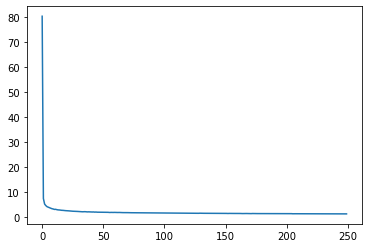

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.show()

In [ ]:
### Test
test_dir = './data/atoms/test/'
test_df = read_data(test_dir)

In [ ]:
#dataloader
test = moleculeTest(test_df)
testloader = DataLoader(test, batch_size=batch_size, shuffle=False)

# load weight
model.load_state_dict(torch.load(weights_path))
model.eval()

predictions = []
with torch.no_grad():
    for _, data in enumerate(testloader):
        x = data[0].to(device)
        id = data[1].item()
        outputs = model(x)
        energy_pred = outputs.item()
        predictions.append({
            'id': id,
            'energy': energy_pred
        })

predictions_df = pd.DataFrame(predictions)
predictions_df = predictions_df.sort_values(by='id').reset_index(drop=True)
output_csv = f'predictions_{num_epochs}_epochs.csv'
predictions_df.to_csv(output_csv, index=False)